In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [122]:
df = pd.read_csv('fifa21_male2.csv')

/var/folders/4m/k401q1_d1z3g7xk757s4764c0000gn/T/ipykernel_63179/3166480517.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_male2.csv')


In [123]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)

In [124]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [126]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66

In [127]:
column_list = df.columns.tolist()
print(column_list)

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [128]:
df.isnull().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

In [129]:
columns = ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision', 'Sliding Tackle']

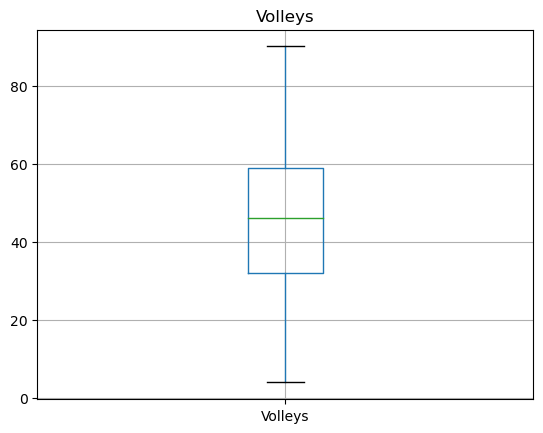

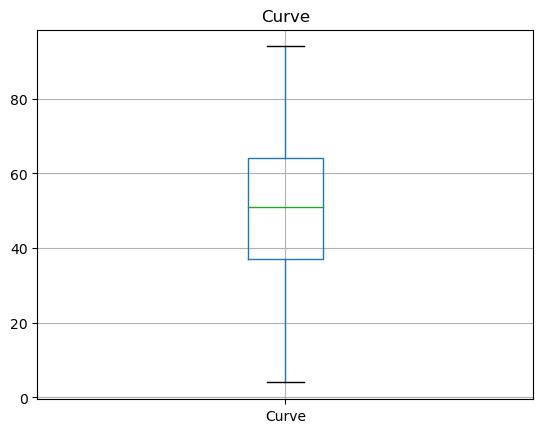

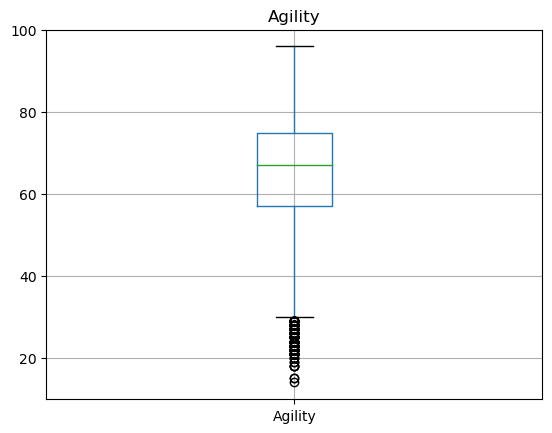

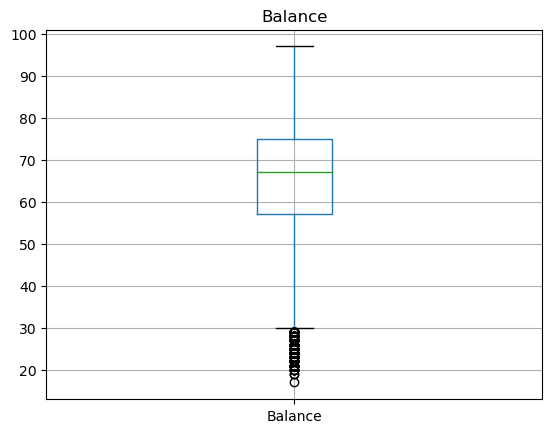

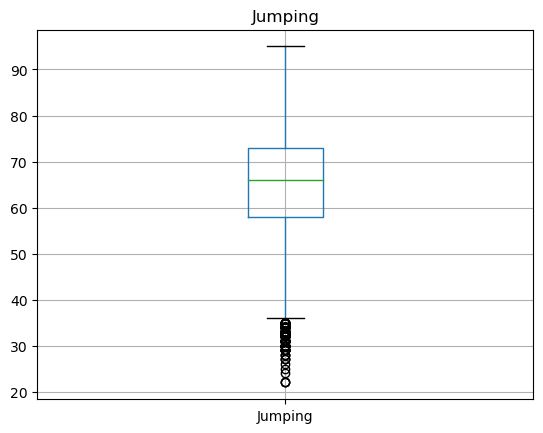

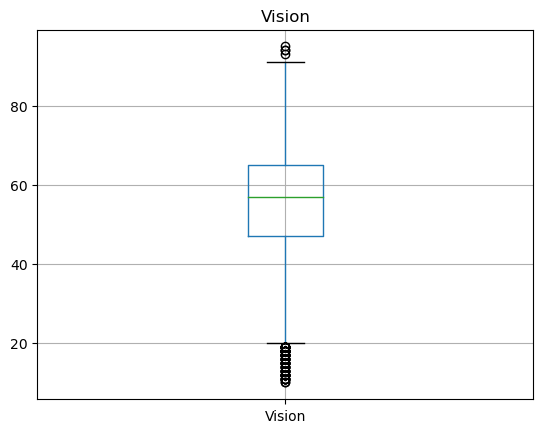

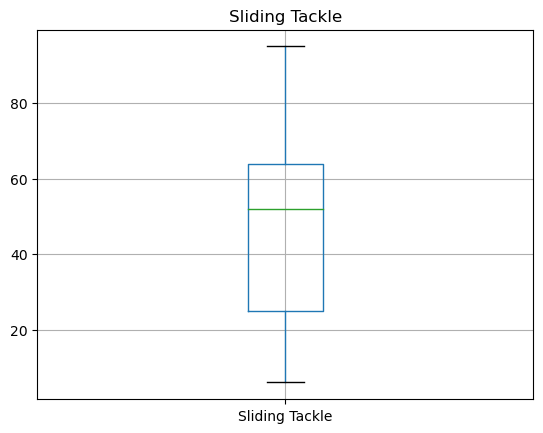

In [130]:
for col in columns:
    plt.figure()
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

In [131]:
volleys_mean = df['Volleys'].mean()
curve_mean = df['Curve'].mean()
agility_median = df['Agility'].median()
balance_median = df['Balance'].median()
jumping_median = df['Jumping'].median()
vision_median = df['Vision'].median()
sliding_tackle_mean = df['Sliding Tackle'].mean()
composure_mean = df['Composure'].mean()
interceptions_mean = df['Interceptions'].mean()
positioning_mean = df['Positioning'].mean()

In [132]:
df['Volleys'].fillna(volleys_mean, inplace=True)
df['Curve'].fillna(curve_mean, inplace=True)
df['Agility'].fillna(agility_median, inplace=True)
df['Balance'].fillna(balance_median, inplace=True)
df['Jumping'].fillna(jumping_median, inplace=True)
df['Vision'].fillna(vision_median, inplace=True)
df['Sliding Tackle'].fillna(sliding_tackle_mean, inplace=True)
df['Composure'].fillna(composure_mean, inplace=True)
df['Interceptions'].fillna(interceptions_mean, inplace=True)
df['Positioning'].fillna(positioning_mean, inplace=True)

In [133]:
df['Club'].fillna('WITHOUT A CLUB', inplace=True)

In [134]:
df['Position'].fillna(df['BP'], inplace=True)

In [135]:
df['A/W'].fillna('MEDIUM', inplace=True)

In [136]:
df['D/W'].fillna('MEDIUM', inplace=True)

In [137]:
df['Joined'].fillna('Dec 31, 2020', inplace=True)

In [138]:
df.drop(['Player Photo', 'Club Logo', 'Flag Photo', 'Loan Date End'], axis=1, inplace=True)

In [139]:
df.isnull().sum()

ID                  0
Name                0
Age                 0
OVA                 0
Nationality         0
Club                0
BOV                 0
BP                  0
Position            0
POT                 0
Team & Contract     0
Height              0
Weight              0
foot                0
Growth              0
Joined              0
Value               0
Wage                0
Release Clause      0
Contract            0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression

In [140]:
# Convert text columns to numeric ones
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('M', 'e6')
df['Value'] = df['Value'].str.replace('K', 'e3')
df['Value'] = df['Value'].astype(float)

df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('K', 'e3')
df['Wage'] = df['Wage'].astype(float)

df['Release Clause'] = df['Release Clause'].str.replace('€', '')
df['Release Clause'] = df['Release Clause'].str.replace('M', 'e6')
df['Release Clause'] = df['Release Clause'].str.replace('K', 'e3')
df['Release Clause'] = df['Release Clause'].astype(float)

In [141]:
# Convert date columns to datetime type
df['Joined'] = pd.to_datetime(df['Joined'])

In [142]:
# Convert height to centimeters
df['Height'] = df['Height'].str.replace("'", '.')
df['Height'] = df['Height'].str.replace('"', '')
df['Height'] = df['Height'].astype(float) * 30.48

In [143]:
# Convert weight to kilograms
df['Weight'] = df['Weight'].str.replace('lbs', '')
df['Weight'] = df['Weight'].astype(float) * 0.453592

In [144]:
df_clean = df.copy()

In [145]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,182.8800,82.100152,Left,0,2008-07-01,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,155.4480,64.863656,Right,0,2014-07-19,600000.0,7000.0,1100000.0,2014 ~ 2019,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,179.8320,73.028312,Right,0,2016-01-07,1100000.0,15000.0,0.0,2016 ~ 2020,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,ST,82,Sunderland 2009,155.7528,74.842680,Right,14,2020-12-31,0.0,0.0,0.0,2009,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,67.0,55,67.0,239,63,66.0,51,66,59,271,59,70.0,72.0,57.0,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,3 ★,1★,MEDIUM,MEDIUM,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,173.7360,68.038800,Right,0,2018-07-16,5500000.0,12000.0,7200000.0,2018 ~ 2021,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [146]:
# Descriptive statistics
df.describe()

,ID,Age,OVA,BOV,POT,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,176.718573,75.141534,5.524788,2.567377e+06,10532.928467,4.574445e+06,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.610394,62.924847,64.723328,302.414774,59.711416,65.173022,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.448876,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,13.728236,7.175002,5.787539,5.372622e+06,21145.376646,1.033846e+07,72.255687,17.875715,19.391547,16.947164,13.960635,17.699432,76.809344,18.047250,18.157516,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.348758,9.037279,14.008409,49.380576,13.417931,11.897960,15.313272,12.627212,19.044862,62.913935,17.021619,20.842444,19.090529,13.707106,15.696363,11.605064,61.595180,20.182548,21.483597,21.149246,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,155.448000,49.895120,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,155.752800,69.853168,0.000000,3.750000e+05,1000.000000,5.080000e+05,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,179.832000,74.842680,4.000000,8.000000e+05,3000.000000,1.300000e+06,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43

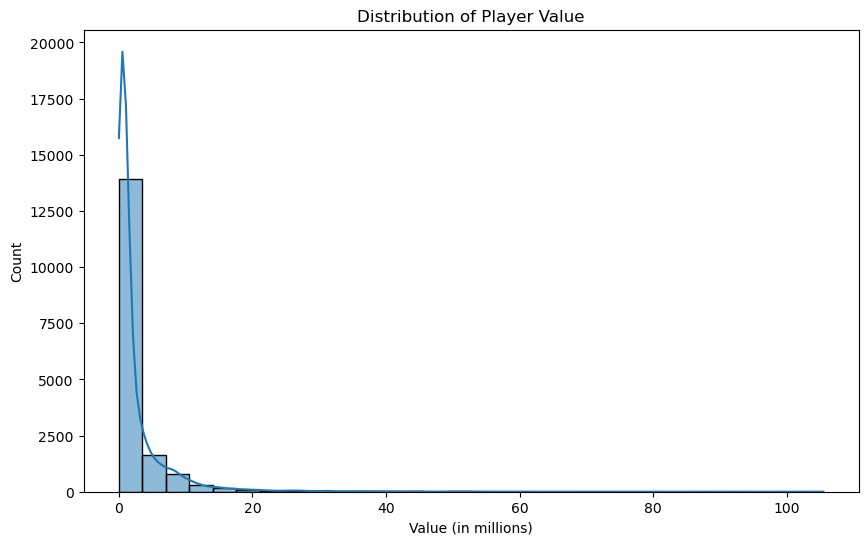

In [147]:
# Market value distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'] / 1e6, bins=30, kde=True)
plt.xlabel('Value (in millions)')
plt.ylabel('Count')
plt.title('Distribution of Player Value')
plt.show()

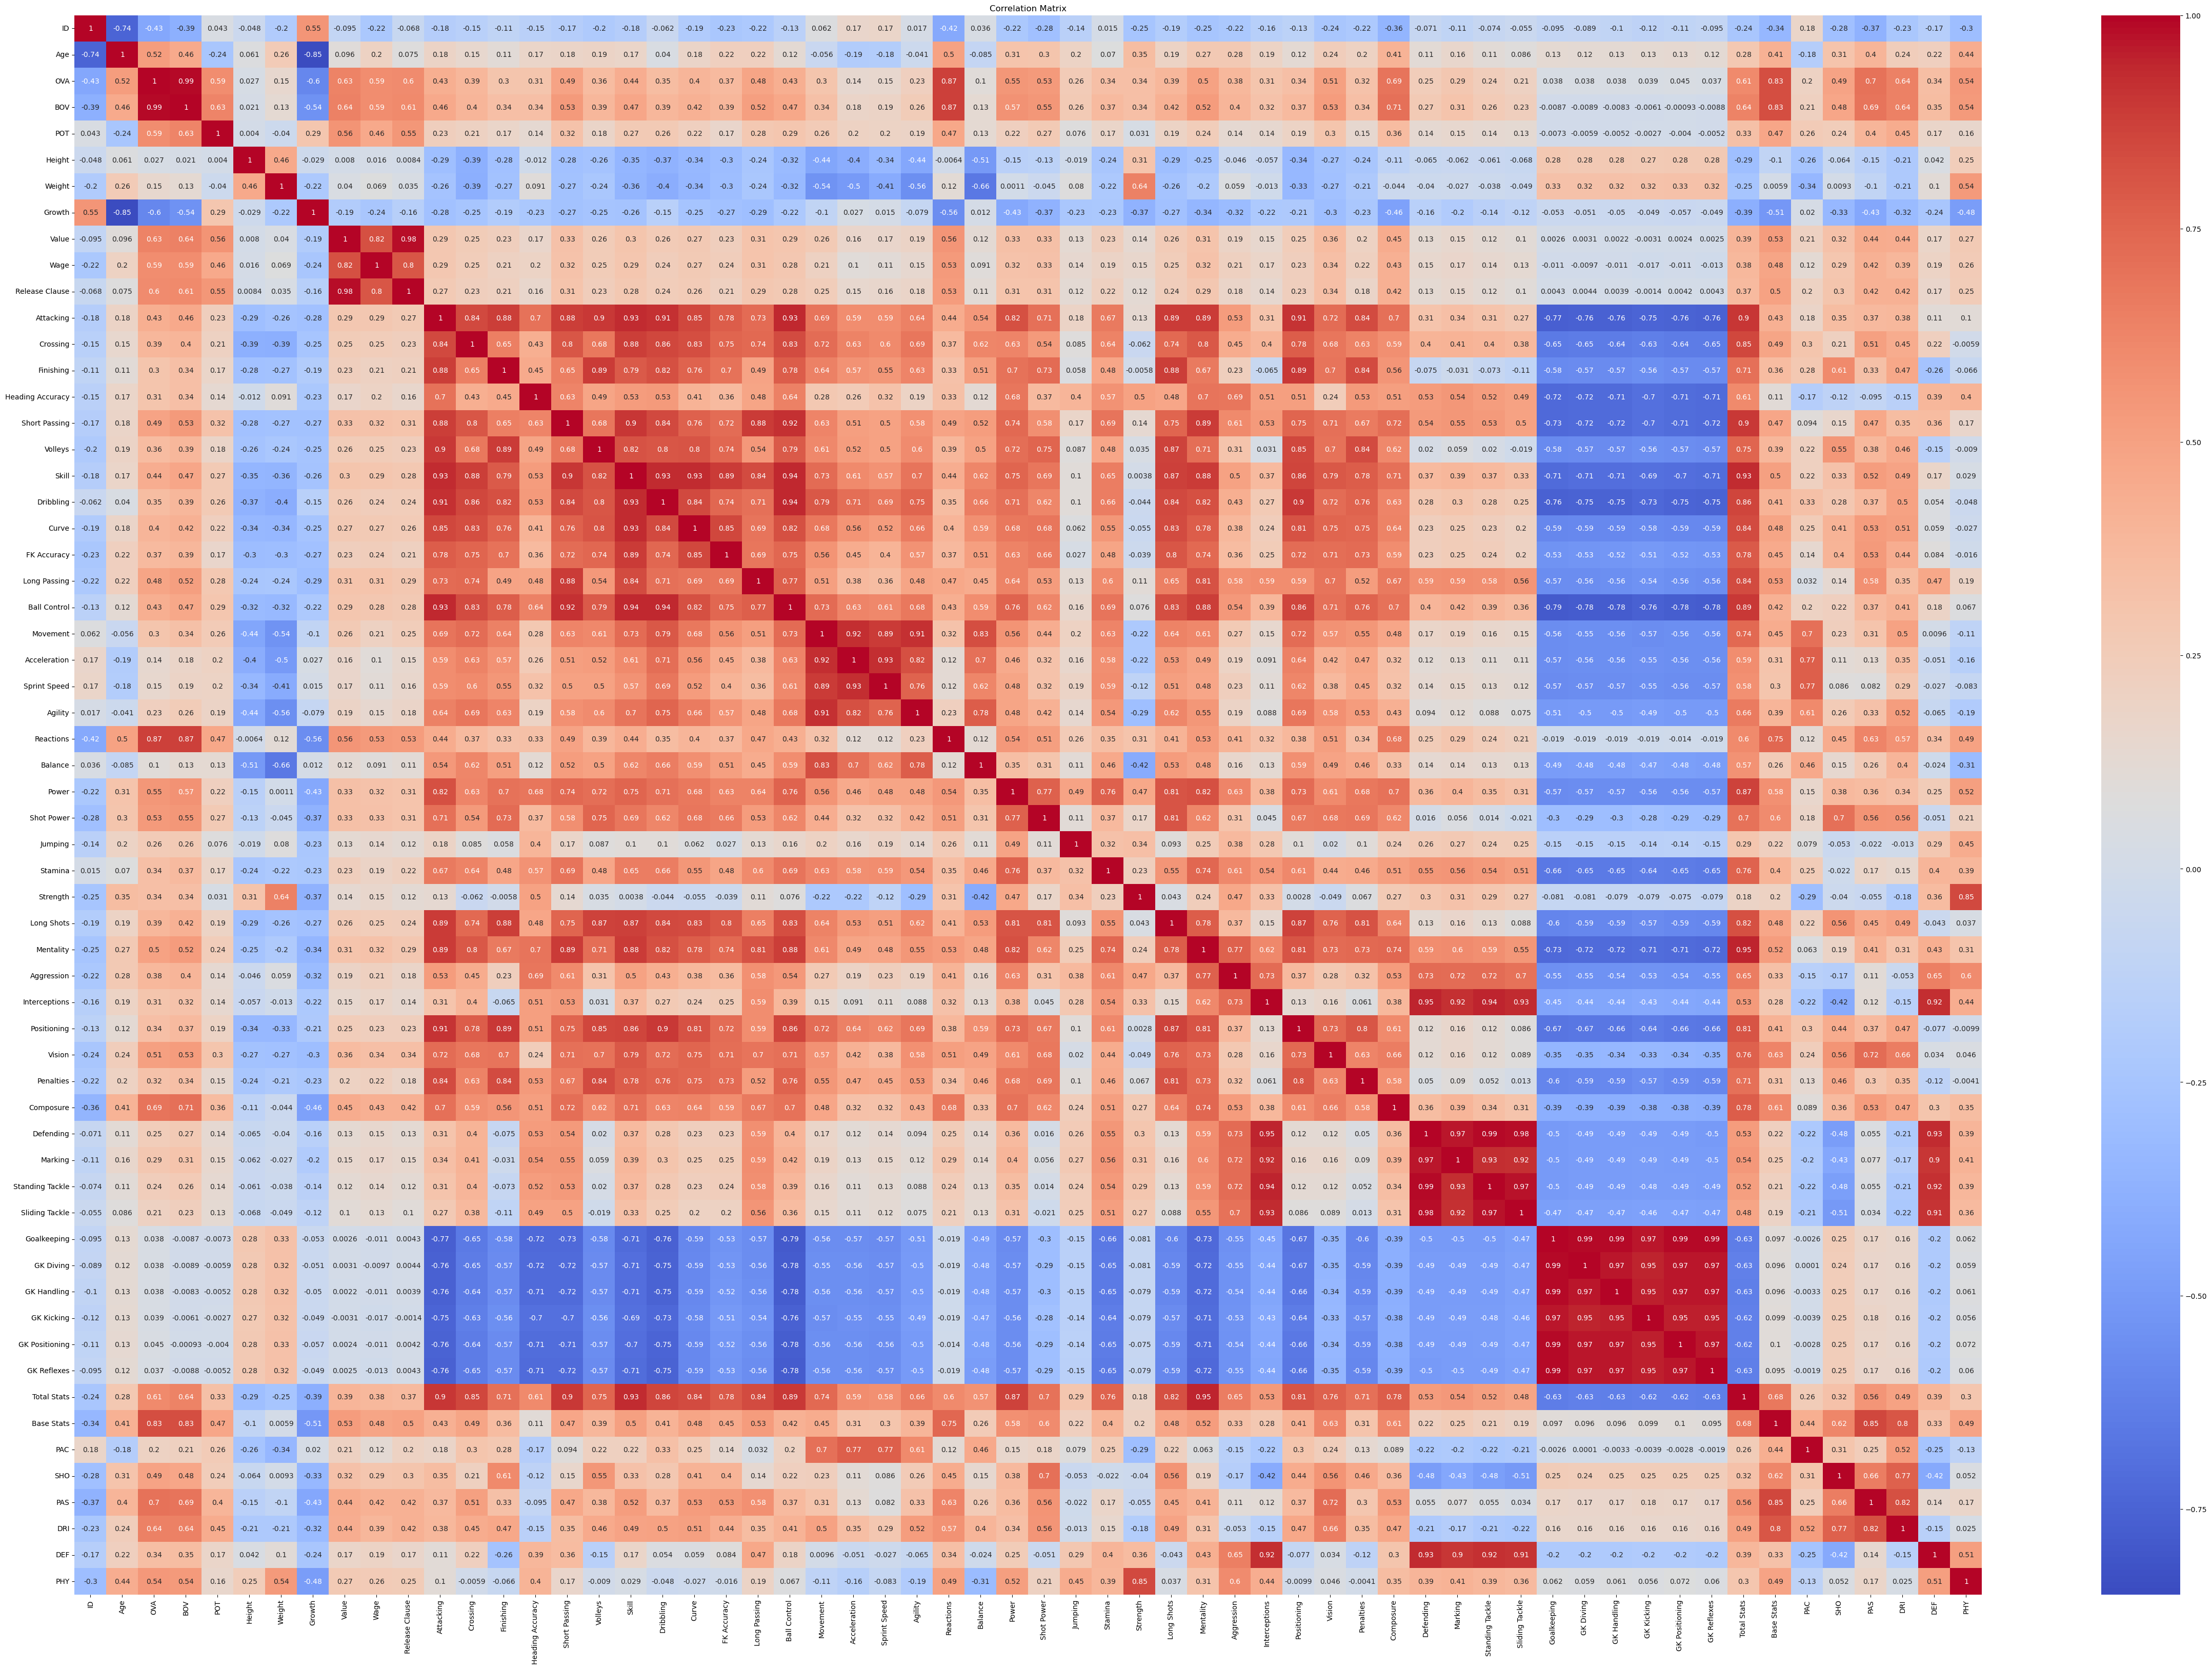

In [148]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(60, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

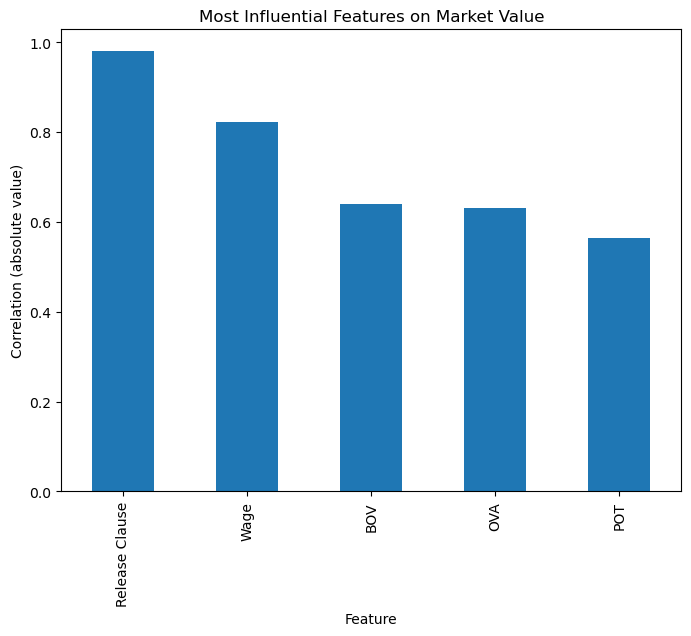

In [149]:
# Most influential features in market value
top_features = corr_matrix['Value'].abs().sort_values(ascending=False)[1:6]
plt.figure(figsize=(8, 6))
top_features.plot(kind='bar')
plt.title('Most Influential Features on Market Value')
plt.xlabel('Feature')
plt.ylabel('Correlation (absolute value)')
plt.show()

In [150]:
# Selecting features and target variable
features = ['Age', 'OVA', 'POT', 'BOV', 'Release Clause', 'Wage']
target = 'Value'

In [151]:
# Creating the feature matrix X and the target vector y
X = df[features]
y = df[target]

In [152]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Creating and training the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [154]:
# Making predictions on the test set
y_pred = regression_model.predict(X_test)

In [155]:
# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Coefficient of Determination (R^2):', r2)

Mean Squared Error: 1219937436068.802
Coefficient of Determination (R^2): 0.9621018874112207


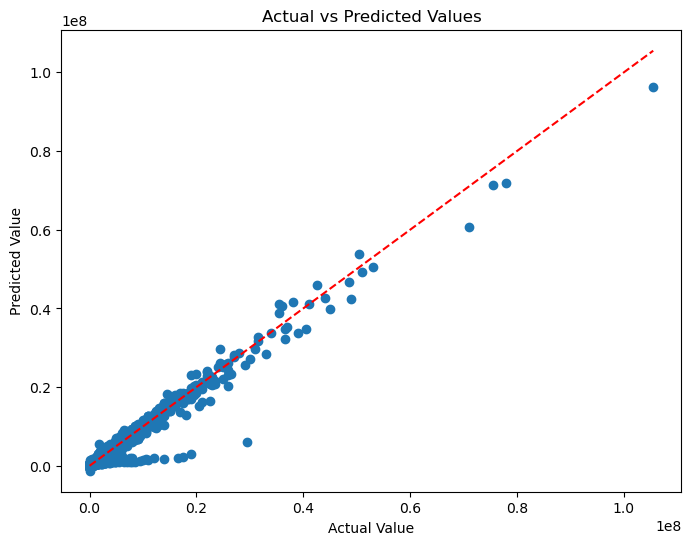

In [156]:
# Visualizing the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.show()

In [157]:
comparison = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred})
print(comparison.head(10))

       Valor Real  Valor Predicho
15195    325000.0    2.947820e+05
14193    975000.0    1.208412e+06
16722    400000.0    5.894538e+05
8037          0.0    2.698513e+05
6350    6000000.0    4.788292e+06
10585    325000.0    9.250907e+03
16075    110000.0   -1.533272e+05
6421    5000000.0    4.030769e+06
3902     775000.0    1.004655e+06
1358    1800000.0    1.301057e+06


In [158]:
nombre_buscar = "L. Messi"

fila = df[df['Name'] == nombre_buscar]

print(fila)


         ID      Name  Age  OVA Nationality          Club  BOV  BP  Position  \
752  158023  L. Messi   33   93   Argentina  FC Barcelona   93  RW  RW ST CF   

     POT           Team & Contract   Height     Weight  foot  Growth  \
752   93  FC Barcelona 2004 ~ 2021  173.736  72.121128  Left       0   

        Joined       Value      Wage  Release Clause     Contract  Attacking  \
752 2004-07-01  67500000.0  560000.0     138400000.0  2004 ~ 2021        429   

     Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Skill  \
752        85         95                70             91     88.0    470   

     Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
752         96   93.0           94            91            96       451   

     Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  \
752            91            80     91.0         94     95.0    389   

     Shot Power  Jumping  Stamina  Strength  Long Shots  Mentality  \
752         

In [159]:
# DataFrame with Lionel Messi's data
messi_data = pd.DataFrame([[33, 93, 93, 93, 138400000.0, 560000]],
                          columns=['Age', 'OVA', 'POT', 'BOV', 'Release Clause', 'Wage'])

# Make the prediction
messi_prediction = regression_model.predict(messi_data)

# Print the predicted value for Lionel Messi
print('Valor predicho para Lionel Messi:', messi_prediction[0])

Valor predicho para Lionel Messi: 76681423.5015131


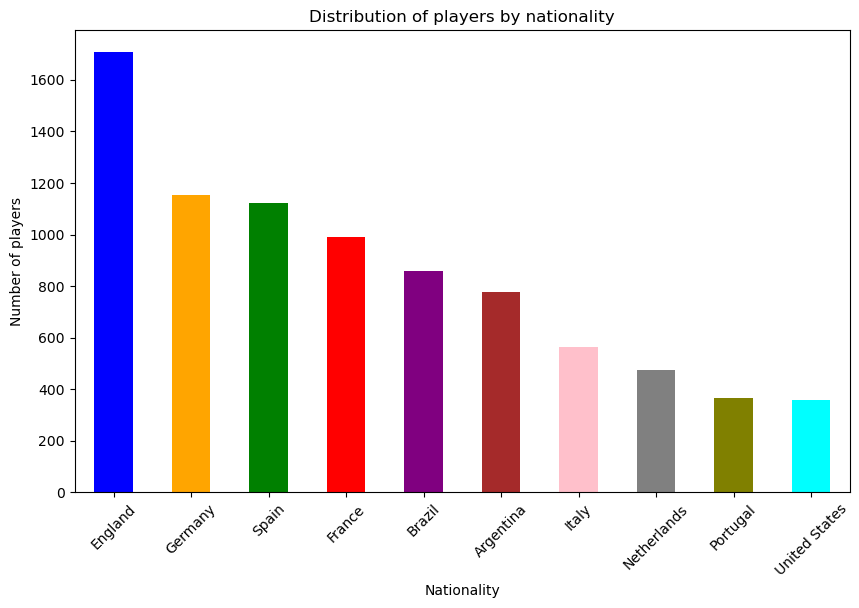

In [103]:
nationality_counts = df['Nationality'].value_counts().head(10)


colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6))
nationality_counts.plot(kind='bar', color=colors)
plt.title('Distribution of players by nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=45) 
plt.show()

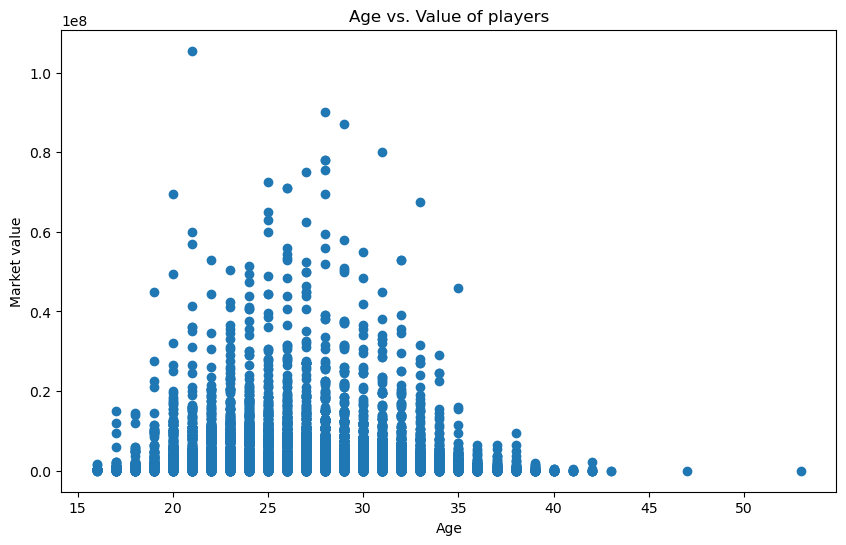

In [104]:
# Scatter plot: Age vs. Value of players
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Value'])
plt.title('Age vs. Value of players')
plt.xlabel('Age')
plt.ylabel('Market value')
plt.show()

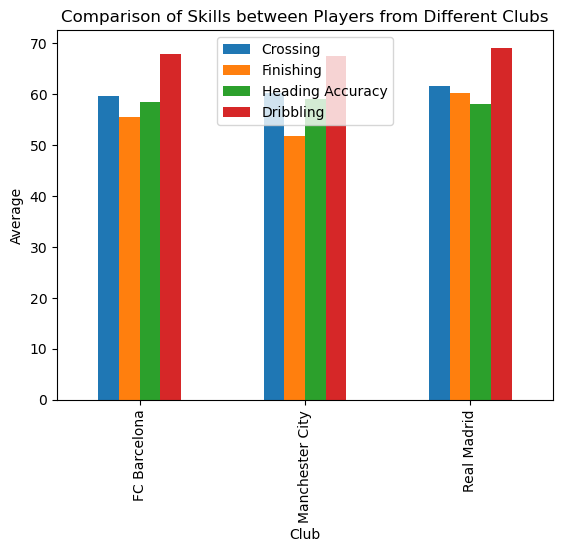

In [105]:
# Compare skills between players from different clubs
selected_clubs = ['Manchester City', 'Real Madrid','FC Barcelona' ]
selected_players = df[df['Club'].isin(selected_clubs)]

# Select the relevant columns for the comparison of skills
skills_columns = ['Crossing', 'Finishing', 'Heading Accuracy', 'Dribbling']
selected_players_skills = selected_players[skills_columns]

# Calculate the average of skills for each column and by club
average_skills_by_club = selected_players_skills.groupby(selected_players['Club']).mean()

# Plot the average skills by club
average_skills_by_club.plot(kind='bar')
plt.xlabel('Club')
plt.ylabel('Average')
plt.title('Comparison of Skills between Players from Different Clubs')
plt.show()

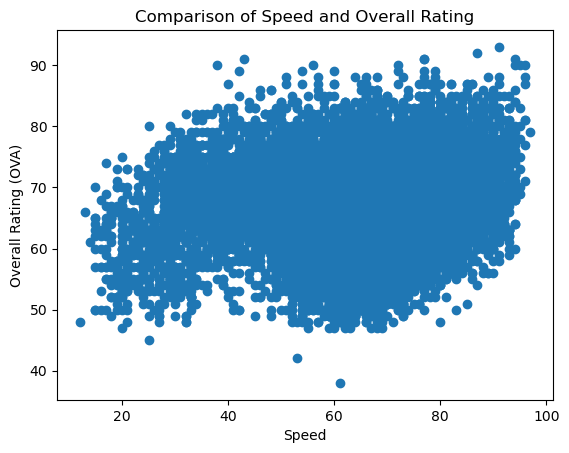

In [106]:
# Select the attributes of interest
speed = df['Acceleration']
ova = df['OVA']

# Plot the scatter between speed and overall rating
plt.scatter(speed, ova)
plt.xlabel('Speed')
plt.ylabel('Overall Rating (OVA)')
plt.title('Comparison of Speed and Overall Rating')
plt.show()

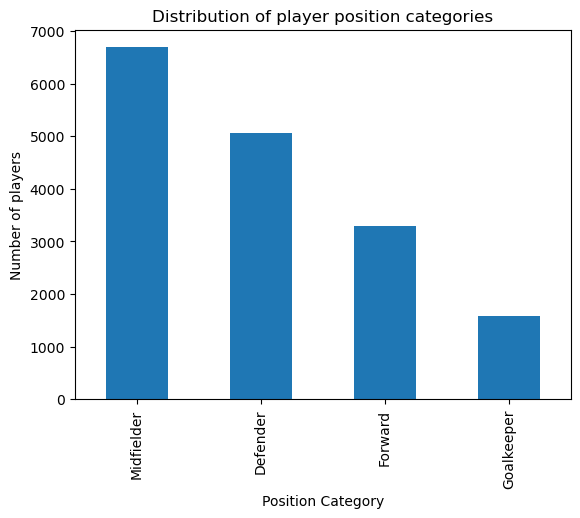

In [107]:
# Create a position mapping dictionary to more general categories
position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'LW': 'Forward',
    'RW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'GK': 'Goalkeeper'
}

# Map positions to the more general categories
df['Position Category'] = df['BP'].map(position_mapping)

# Count the frequency of each position category
position_category_counts = df['Position Category'].value_counts()

# Plot the distribution of position categories
position_category_counts.plot(kind='bar')
plt.xlabel('Position Category')
plt.ylabel('Number of players')
plt.title('Distribution of player position categories')
plt.show()

In [108]:
# Sort the dataframe by overall rating (OVA) in descending order
df_sorted = df.sort_values('OVA', ascending=False)

# Get the top 5 players.
top_players = df_sorted.head(5)

# Print the top 5 players.
print(top_players[['Name', 'OVA']])

                   Name  OVA
752            L. Messi   93
142   Cristiano Ronaldo   92
2871       K. De Bruyne   91
2287     R. Lewandowski   91
2650          Neymar Jr   91


In [109]:
# Get the top players in different positions.
positions = {
    'Goalkeeper': 'Goalkeeper',
    'Defender': 'Defender',
    'Midfielder': 'Midfielder',
    'Forward': 'Forward'
}

number_of_players = {
    'Goalkeeper': 1,
    'Defender': 3,
    'Midfielder': 4,
    'Forward': 3
}

best_players = {}

for position, position_code in positions.items():
    # Filter the players by position.
    players_by_position = df[df['Position Category'] == position_code]
    
   # Sort the players by overall score (OVA) in descending order.
    sorted_players = players_by_position.sort_values('OVA', ascending=False)
    
    # Get the desired number of top players for the position.
    number_of_top_players = number_of_players[position]
    
    # Get the top players in the desired position.
    best_players[position] = sorted_players.iloc[:number_of_top_players]

# Print the top players by position.
for position, players in best_players.items():
    print(f"Top players in the position {position}:")
    for i, player in enumerate(players.iterrows(), 1):
        print(f"{i}. {player[1]['Name']} - overall score (OVA): {player[1]['OVA']}")


Top players in the position Goalkeeper:
1. J. Oblak - overall score (OVA): 91
Top players in the position Defender:
1. V. van Dijk - overall score (OVA): 90
2. Sergio Ramos - overall score (OVA): 89
3. K. Koulibaly - overall score (OVA): 88
Top players in the position Midfielder:
1. K. De Bruyne - overall score (OVA): 91
2. Casemiro - overall score (OVA): 89
3. T. Kroos - overall score (OVA): 88
4. J. Kimmich - overall score (OVA): 88
Top players in the position Forward:
1. L. Messi - overall score (OVA): 93
2. Cristiano Ronaldo - overall score (OVA): 92
3. R. Lewandowski - overall score (OVA): 91


In [110]:
df_sorted = df.sort_values(by='Wage', ascending=False)

In [111]:
top_10_players = df_sorted.head(10)

In [112]:
print(top_10_players[['Name', 'Wage', 'OVA']])

              Name      Wage  OVA
752       L. Messi  560000.0   93
2871  K. De Bruyne  370000.0   91
1800     E. Hazard  350000.0   88
946     K. Benzema  350000.0   89
1753      T. Kroos  310000.0   88
3630      Casemiro  310000.0   89
662      S. Agüero  300000.0   89
681   Sergio Ramos  300000.0   89
3102  A. Griezmann  290000.0   87
4049   R. Sterling  270000.0   88
